In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Task 1-1. (6 점) 데이터 불러오기
data = pd.read_csv('./owid-covid-data.csv')

# Task 1-2. (6 점) ‘date’ 열의 데이터를 날짜 타입으로 변경하기
data['date'] = pd.to_datetime(data['date'])
date = data['date']
Korea = data[data['iso_code'] == 'KOR']
Japan = data[data['iso_code'] == 'JPN']

data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

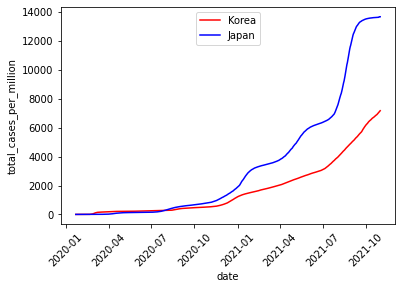

In [75]:
# Task 2-1. (8 점) 한국, 일본의 날짜별 확진자 비율 (total_cases_per_million) 시각화
plt.plot(Korea['date'], Korea['total_cases_per_million'], 'r-', label='Korea')
plt.plot(Japan['date'], Japan['total_cases_per_million'], 'b-', label='Japan')

plt.legend(loc="upper center")
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.xticks(rotation=45)
plt.show()
# 한국의 비율이 더 낮은 것을 알 수 있습니다.

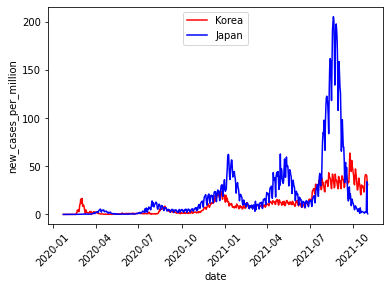

In [76]:
# Task 2-2. (8 점) 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화
plt.plot(Korea['date'], Korea['new_cases_per_million'], 'r-', label='Korea')
plt.plot(Japan['date'], Japan['new_cases_per_million'], 'b-', label='Japan')

plt.legend(loc="upper center")
plt.xlabel("date")
plt.ylabel("new_cases_per_million")
plt.xticks(rotation=45)

plt.show()
# 마찬가지로 한국이 더 낮을 것이 보입니다

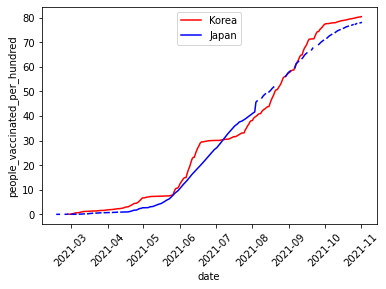

In [78]:
# Task 2-3. (8 점) 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화
plt.plot(Korea['date'], Korea['people_vaccinated_per_hundred'], 'r-', label='Korea')
plt.plot(Japan['date'], Japan['people_vaccinated_per_hundred'], 'b-', label='Japan')

plt.legend(loc="upper center")
plt.xlabel("date")
plt.ylabel("people_vaccinated_per_hundred")
plt.xticks(rotation=45)
plt.show()
# 백신 접종자의 비율은 2021년 9월부터 따라잡기 시작했습니다.

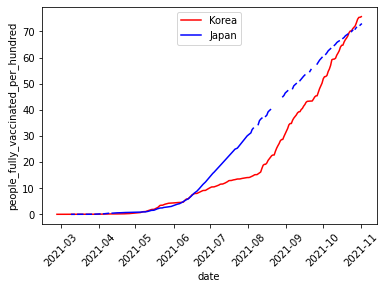

In [79]:
# Task 2-4. (8 점) 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred)
plt.plot(Korea['date'], Korea['people_fully_vaccinated_per_hundred'], 'r-', label='Korea')
plt.plot(Japan['date'], Japan['people_fully_vaccinated_per_hundred'], 'b-', label='Japan')

plt.legend(loc="upper center")
plt.xlabel("date")
plt.ylabel("people_fully_vaccinated_per_hundred")
plt.xticks(rotation=45)
plt.show()
# 백신 접종 완료자의 비율은 7월부터 일본이 높았으나 최근에는 한국이 미세하게 조금 더 높았습니다

In [80]:
# Task 3-1. (5 점) Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기
new_data = data[['location', 'date', 'total_deaths_per_million', 'total_cases_per_million','people_vaccinated_per_hundred' \
                 ,'human_development_index']]
new_data                

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
127812,Zimbabwe,2021-10-28,309.763,8804.565,21.91,0.571
127813,Zimbabwe,2021-10-29,309.763,8807.613,21.97,0.571
127814,Zimbabwe,2021-10-30,309.763,8807.613,22.00,0.571
127815,Zimbabwe,2021-10-31,309.962,8810.992,22.02,0.571


In [241]:
# Task 3-2. (6 점) 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max
# country_names = data.groupby(data['location'])
# country_names.describe()
recent = data.loc[data.groupby(['location'])['date'].idxmax()]
recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
616,AFG,Asia,Afghanistan,2021-11-01,156284.0,34.0,34.857,7281.0,1.0,3.000,3923.241,0.854,0.875,182.777,0.025,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1244,OWID_AFR,NaN,Africa,2021-11-01,8503442.0,4055.0,4318.000,218395.0,161.0,181.857,6191.136,2.952,3.144,159.008,0.117,0.132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.967237e+08,1.226110e+08,8.238082e+07,73024.0,41698.0,1627704.0,14.32,8.93,6.00,0.01,1185.0,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,ALB,Europe,Albania,2021-11-01,185497.0,197.0,505.286,2931.0,7.0,7.286,64567.094,68.571,175.878,1020.211,2.437,2.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
2476,DZA,Africa,Algeria,2021-11-01,206566.0,114.0,94.714,5924.0,4.0,4.286,4629.799,2.555,2.123,132.776,0.090,0.096,NaN,14.0,0.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.81,4.461663e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
3086,AND,Europe,Andorra,2021-11-01,15516.0,0.0,13.000,130.0,0.0,0.000,200584.327,0.000,168.059,1680.585,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74,7.735400e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125409,WLF,Oceania,Wallis and Futuna,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.157700e+04,5.938000e+03,5.639000e+03,NaN,NaN,31.0,104.35,53.52,50.83,NaN,2794.0,NaN,1.109400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
126059,OWID_WRL,NaN,World,2021-11-01,247144542.0,431321.0,435225.000,5006105.0,6234.0,7218.000,31383.570,54.771,55.267,635.699,0.792,0.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.103868e+09,3.908158e+09,3.059960e+09,83923366.0,19065427.0,28052042.

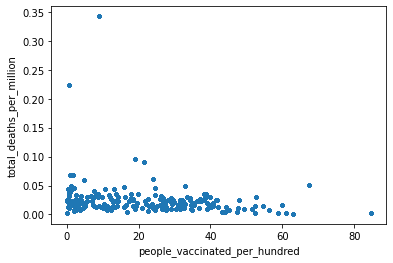

In [242]:
# Task 3-3. (10 점) 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기
new = data.groupby(['location', 'people_vaccinated_per_hundred', 'total_deaths_per_million', 'total_cases_per_million' ]).mean()
new_vac= data.groupby(['location'])['people_vaccinated_per_hundred'].transform('mean')
new_deaths= data.groupby(['location'])['total_deaths_per_million'].transform('mean')
new_cases= data.groupby(['location'])['total_cases_per_million'].transform('mean')

plt.scatter(new_vac, new_deaths/new_cases,s=5)
plt.xlabel("people_vaccinated_per_hundred")
plt.ylabel("total_deaths_per_million")
plt.show()


In [143]:
 # Task 3-4. (10 점) 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)
 def pearson_similarity(u1, u2):
   u1_c = u1 - u1.mean()
   u2_c = u2 - u2.mean()
   denom = np.sqrt(np.sum(u1_c ** 2) * np.sum(u2_c ** 2))
   if denom != 0:
       return np.sum(u1_c * u2_c)/denom
   else:
       return 0

In [257]:
for d in range(data.shape[0]):
    ps = pearson_similarity(recent['people_vaccinated_per_hundred'], recent['total_deaths_per_million'])


In [268]:
ps

0.0305354517495479

In [267]:
# Task 4-1. (5 점) Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기
# 라이브러리 함수로 구현해봤습니다.
import scipy.stats as stats

new = recent[['location','human_development_index', 'people_vaccinated_per_hundred']].dropna()
x = [new['human_development_index'], new['people_vaccinated_per_hundred']]
corr = stats.pearsonr(new['human_development_index'], new['people_vaccinated_per_hundred'])
print(f"Pearson Correlation Coefficient: {corr[0]}")

Pearson Correlation Coefficient: 0.7199996065469272


In [264]:
# Task 4-2. (10점) Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)
from sklearn.linear_model import LinearRegression
## X와 y의 NAN 데이터 제거 후, 갯수 맞춰주기
new = recent[['human_development_index', 'people_vaccinated_per_hundred']].dropna()
# X = new.groupby(['location'])['human_development_index']
# y = new.groupby(['location'])['people_vaccinated_per_hundred']
X = new['human_development_index']
y = new['people_vaccinated_per_hundred']
print(X.shape[0])

lr = LinearRegression()
lr.fit(X.values.reshape(-1,1), y.values.reshape(-1,1))
print(f"w : {lr.coef_}, b : {lr.intercept_}")

47
w : [[139.57406094]], b : [-56.37611922]


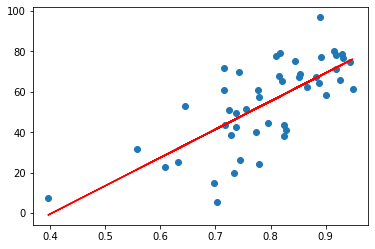

In [256]:
# Task 4-3. (10점) HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기
plt.scatter(X, y)
plt.plot(X.values.reshape(-1,1), lr.predict(X.values.reshape(-1,1)), c='red')
plt.show()